### Importing Libraries and loading the dataset

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('marketing_campaign.csv', sep = '\t')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Data Cleaning and Preprocessing

In [6]:
# Checking for duplicate values
df.duplicated().sum()

0

In [7]:
# Checking if there are any missing values in the data
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

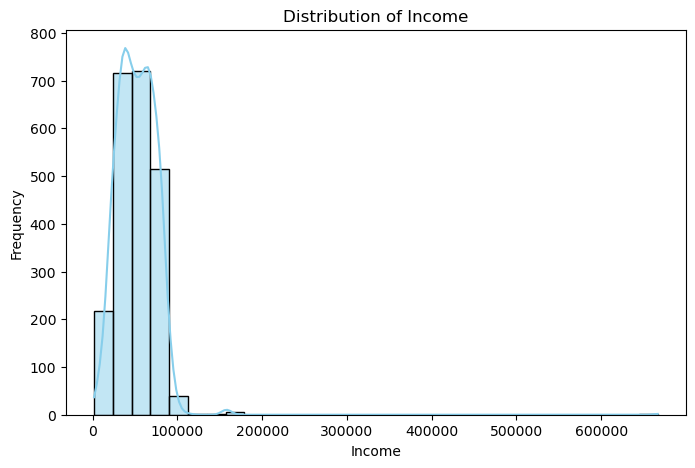

In [8]:
# Checking the distribution of the Income column
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (8,5))
sns.histplot(df['Income'], bins = 30, kde = True, color = 'skyblue')
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

In [9]:
# Since the 'Income' columns is highly right-skewed, therefore using median imputation to fill the missing values
df['Income'] = df['Income'].fillna(df['Income'].median())

In [10]:
df['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [11]:
# Encoding the categorical feature 'Education'
from sklearn.preprocessing import OrdinalEncoder
education_order = [['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD']]
encoder = OrdinalEncoder(categories = education_order)
df['Education'] = encoder.fit_transform(df[['Education']])

In [12]:
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [13]:
# There are some anomalies in the 'Marital_Status' column like 'Alone', 'Absurd' and 'YOLO'.
# Grouping these anomaly values into a category called 'Other'.
# Defining valid categories
valid_statuses = ['Married', 'Together', 'Single', 'Divorced', 'Widow']
# Replacing the rare categories(anomalies) with 'Other'
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: x if x in valid_statuses else 'Other')

# Now, applying one-hot encoding to the 'Marital_Status' column
df = pd.get_dummies(df, columns = ['Marital_Status'], drop_first = True, dtype = 'int')

In [14]:
df

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Marital_Status_Married,Marital_Status_Other,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,5524,1957,2.0,58138.0,0,0,04-09-2012,58,635,88,...,0,0,3,11,1,0,0,1,0,0
1,2174,1954,2.0,46344.0,1,1,08-03-2014,38,11,1,...,0,0,3,11,0,0,0,1,0,0
2,4141,1965,2.0,71613.0,0,0,21-08-2013,26,426,49,...,0,0,3,11,0,0,0,0,1,0
3,6182,1984,2.0,26646.0,1,0,10-02-2014,26,11,4,...,0,0,3,11,0,0,0,0,1,0
4,5324,1981,4.0,58293.0,1,0,19-01-2014,94,173,43,...,0,0,3,11,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,2.0,61223.0,0,1,13-06-2013,46,709,43,...,0,0,3,11,0,1,0,0,0,0
2236,4001,1946,4.0,64014.0,2,1,10-06-2014,56,406,0,...,0,0,3,11,0,0,0,0,1,0
2237,7270,1981,2.0,56981.0,0,0,25-01-2014,91,908,48,...,0,0,3,11,0,0,0,0,0,0
2238,8235,1956,3.0,69245.0,0,1,24-01-2014,8,428,30,...,0,0,3,11,0,0,0,0,1,0


In [15]:
# Converting the 'Dt_Customer' column to Date Time format as it is currently in string format.
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format = '%d-%m-%Y')
# Creating a columns called 'Customer_Tenure' indicating how long each customer has been with the company (in days).
df['Customer_Tenure'] = (df['Dt_Customer'].max() - df['Dt_Customer']).dt.days
# Dropping the 'Dt_Customer' column
df.drop('Dt_Customer', axis = 1, inplace = True)

In [16]:
# Dropping the two columns 'Z_CostContact' and 'Z_Revenue' as they have no variance (same value for every customer) and provide no predictive power.
# Including them will confuse distance-based models like K-Means (they'll just add noise).
df.drop(columns = ['Z_CostContact', 'Z_Revenue'], inplace = True)
df

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Marital_Status_Married,Marital_Status_Other,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Customer_Tenure
0,5524,1957,2.0,58138.0,0,0,58,635,88,546,...,0,0,0,1,0,0,1,0,0,663
1,2174,1954,2.0,46344.0,1,1,38,11,1,6,...,0,0,0,0,0,0,1,0,0,113
2,4141,1965,2.0,71613.0,0,0,26,426,49,127,...,0,0,0,0,0,0,0,1,0,312
3,6182,1984,2.0,26646.0,1,0,26,11,4,20,...,0,0,0,0,0,0,0,1,0,139
4,5324,1981,4.0,58293.0,1,0,94,173,43,118,...,0,0,0,0,1,0,0,0,0,161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,2.0,61223.0,0,1,46,709,43,182,...,0,0,0,0,1,0,0,0,0,381
2236,4001,1946,4.0,64014.0,2,1,56,406,0,30,...,1,0,0,0,0,0,0,1,0,19
2237,7270,1981,2.0,56981.0,0,0,91,908,48,217,...,0,0,0,0,0,0,0,0,0,155
2238,8235,1956,3.0,69245.0,0,1,8,428,30,214,...,0,0,0,0,0,0,0,1,0,156


In [17]:
# Performing feature scaling for Clustering
# Using standard scaler to standardize the data
from sklearn.preprocessing import StandardScaler
# Selecting all numerical features for clustering except ID 
features_to_cluster = df.drop(columns = ['ID'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_to_cluster)
df_scaled = pd.DataFrame(scaled_features, columns = features_to_cluster.columns, index = df.index)
df_scaled

,Year_Birth,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Marital_Status_Married,Marital_Status_Other,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Customer_Tenure
0,-0.985345,-0.458383,0.235696,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,2.462147,...,-0.262111,-0.11651,-0.097282,2.388846,-0.792406,-0.055989,1.914854,-0.591099,-0.188676,1.531185
1,-1.235733,-0.458383,-0.235454,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,...,-0.262111,-0.11651,-0.097282,-0.418612,-0.792406,-0.055989,1.914854,-0.591099,-0.188676,-1.190545
2,-0.317643,-0.458383,0.773999,-0.825218,-0.929894,-0.798086,0.362723,0.570804,-0.177032,1.345274,...,-0.262111,-0.11651,-0.097282,-0.418612,-0.792406,-0.055989,-0.522233,1.691765,-0.188676,-0.205773
3,1.268149,-0.458383,-1.022355,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,...,-0.262111,-0.11651,-0.097282,-0.418612,-0.792406,-0.055989,-0.522233,1.691765,-0.188676,-1.061881
4,1.017761,1.533425,0.241888,1.032559,-0.929894,1.550305,-0.389085,0.419916,-0.216914,0.155164,...,-0.262111,-0.11651,-0.097282,-0.418612,1.261980,-0.055989,-0.522233,-0.591099,-0.188676,-0.953012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,-0.150717,-0.458383,0.358936,-0.825218,0.906934,-0.107383,1.203678,0.419916,0.066692,0.081926,...,-0.262111,-0.11651,-0.097282,-0.418612,1.261980,-0.055989,-0.522233,-0.591099,-0.188676,0.135680
2236,-1.903435,1.533425,0.470432,2.890335,0.906934,0.237969,0.303291,-0.661449,-0.606873,-0.687068,...,3.815174,-0.11651,-0.097282,-0.418612,-0.792406,-0.055989,-0.522233,1.691765,-0.188676,-1.655713
2237,1.017761,-0.458383,0.189476,-0.825218,-0.929894,1.446700,1.795020,0.545656,0.221789,-0.101168,...,-0.262111,-0.11651,-0.097282,-0.418612,-0.792406,-0.055989,-0.522233,-0.591099,-0.188676,-0.982703
2238,-1.068807,0.537521,0.679401,-0.825218,0.906934,-1.419719,0.368666,0.092992,0.208495,0.777683,...,-0.262111,-0.11651,-0.097282,-0.418612,-0.792406,-0.055989,-0.522233,1.691765,-0.188676,-0.977755


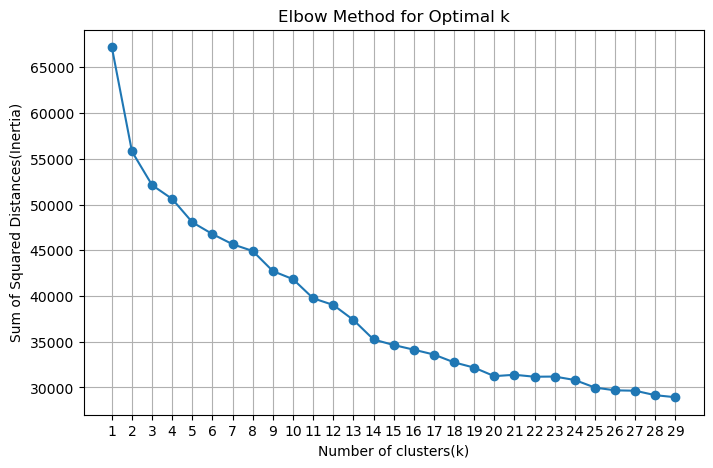

In [18]:
# Using K Means clustering to form clusters of the data
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Using the elbow method to determine the optimal number of k
wcss = []
for i in range(1,30):
    km = KMeans(n_clusters = i, n_init = 'auto', random_state = 42)
    km.fit(df_scaled)
    wcss.append(km.inertia_)

# Plotting the elbow curve
plt.figure(figsize = (8,5))
plt.plot(range(1,30), wcss, marker = 'o')
plt.xticks(range(1,30))
plt.xlabel('Number of clusters(k)')
plt.ylabel('Sum of Squared Distances(Inertia)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [19]:
# Looking at the elbow curve, k = 5 seems the optimal value of k as the reduction in inertia after k = 5 is significantly less. The drop in inertia is not that much.
# Applying kmeans with k = 5
kmeans = KMeans(n_clusters = 5, random_state = 42, n_init = 'auto')
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)

In [20]:
df_scaled

,Year_Birth,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp2,Complain,Response,Marital_Status_Married,Marital_Status_Other,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Customer_Tenure,Cluster
0,-0.985345,-0.458383,0.235696,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,2.462147,...,-0.11651,-0.097282,2.388846,-0.792406,-0.055989,1.914854,-0.591099,-0.188676,1.531185,4
1,-1.235733,-0.458383,-0.235454,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,...,-0.11651,-0.097282,-0.418612,-0.792406,-0.055989,1.914854,-0.591099,-0.188676,-1.190545,0
2,-0.317643,-0.458383,0.773999,-0.825218,-0.929894,-0.798086,0.362723,0.570804,-0.177032,1.345274,...,-0.11651,-0.097282,-0.418612,-0.792406,-0.055989,-0.522233,1.691765,-0.188676,-0.205773,4
3,1.268149,-0.458383,-1.022355,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,...,-0.11651,-0.097282,-0.418612,-0.792406,-0.055989,-0.522233,1.691765,-0.188676,-1.061881,2
4,1.017761,1.533425,0.241888,1.032559,-0.929894,1.550305,-0.389085,0.419916,-0.216914,0.155164,...,-0.11651,-0.097282,-0.418612,1.261980,-0.055989,-0.522233,-0.591099,-0.188676,-0.953012,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,-0.150717,-0.458383,0.358936,-0.825218,0.906934,-0.107383,1.203678,0.419916,0.066692,0.081926,...,-0.11651,-0.097282,-0.418612,1.261980,-0.055989,-0.522233,-0.591099,-0.188676,0.135680,3
2236,-1.903435,1.533425,0.470432,2.890335,0.906934,0.237969,0.303291,-0.661449,-0.606873,-0.687068,...,-0.11651,-0.097282,-0.418612,-0.792406,-0.055989,-0.522233,1.691765,-0.188676,-1.655713,3
2237,1.017761,-0.458383,0.189476,-0.825218,-0.929894,1.446700,1.795020,0.545656,0.221789,-0.101168,...,-0.11651,-0.097282,-0.418612,-0.792406,-0.055989,-0.522233,-0.591099,-0.188676,-0.982703,3
2238,-1.068807,0.537521,0.679401,-0.825218,0.906934,-1.419719,0.368666,0.092992,0.208495,0.777683,...,-0.11651,-0.097282,-0.418612,-0.792406,-0.055989,-0.522233,1.691765,-0.188676,-0.977755,3


### Analysing Clusters to understand Customer Behavior

In [22]:
# Mapping the cluster columns to the original unscaled dataframe
df_original = df.copy()
df_original['Cluster'] = df_scaled['Cluster']

In [23]:
df_original

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp2,Complain,Response,Marital_Status_Married,Marital_Status_Other,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Customer_Tenure,Cluster
0,5524,1957,2.0,58138.0,0,0,58,635,88,546,...,0,0,1,0,0,1,0,0,663,4
1,2174,1954,2.0,46344.0,1,1,38,11,1,6,...,0,0,0,0,0,1,0,0,113,0
2,4141,1965,2.0,71613.0,0,0,26,426,49,127,...,0,0,0,0,0,0,1,0,312,4
3,6182,1984,2.0,26646.0,1,0,26,11,4,20,...,0,0,0,0,0,0,1,0,139,2
4,5324,1981,4.0,58293.0,1,0,94,173,43,118,...,0,0,0,1,0,0,0,0,161,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,2.0,61223.0,0,1,46,709,43,182,...,0,0,0,1,0,0,0,0,381,3
2236,4001,1946,4.0,64014.0,2,1,56,406,0,30,...,0,0,0,0,0,0,1,0,19,3
2237,7270,1981,2.0,56981.0,0,0,91,908,48,217,...,0,0,0,0,0,0,0,0,155,3
2238,8235,1956,3.0,69245.0,0,1,8,428,30,214,...,0,0,0,0,0,0,1,0,156,3


In [24]:
# Checking cluster sizes
df_original['Cluster'].value_counts()

Cluster
2    813
3    543
4    440
0    274
1    170
Name: count, dtype: int64

In [25]:
# Grouping the original data by cluster and computing the mean
cluster_summary = df_original.groupby('Cluster').mean().round(2)
cluster_summary

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Marital_Status_Married,Marital_Status_Other,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Customer_Tenure
Cluster,,,,,,,,,,,,,,,,,,,,,
0,5358.31,1973.02,2.28,36157.16,0.76,0.43,48.85,63.34,7.73,34.73,...,0.01,0.00,0.01,0.14,0.00,0.00,1.00,0.00,0.00,331.41
1,5581.33,1969.32,2.58,81623.96,0.05,0.13,49.75,874.20,56.76,466.69,...,0.44,0.12,0.01,0.58,0.42,0.01,0.18,0.26,0.05,355.35
2,5658.91,1970.82,2.33,35683.21,0.77,0.47,49.30,43.58,4.93,23.53,...,0.00,0.00,0.01,0.08,0.51,0.00,0.00,0.33,0.03,319.01
3,5560.98,1964.18,2.76,58048.15,0.23,0.96,48.59,486.02,21.03,137.31,...,0.03,0.01,0.01,0.11,0.42,0.01,0.11,0.28,0.04,412.34
4,5657.11,1967.97,2.40,74316.67,0.05,0.22,49.32,489.79,72.10,435.07,...,0.11,0.00,0.01,0.17,0.34,0.00,0.26,0.25,0.05,358.08


In [26]:
# Analyzing clusters based on purchases
cluster_purchase = cluster_summary[['Income','NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Recency']]
cluster_purchase

,Income,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
Cluster,,,,,,,
0,36157.16,2.24,2.61,0.78,3.53,6.50,48.85
1,81623.96,1.05,5.44,6.05,8.26,3.00,49.75
2,35683.21,2.04,2.12,0.57,3.26,6.38,49.30
3,58048.15,3.89,6.48,3.15,7.83,5.84,48.59
4,74316.67,1.47,5.16,5.80,8.40,2.87,49.32


In [27]:
# Analyzing clusters based on products
cluster_products = cluster_summary[['Income', 'Customer_Tenure', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
cluster_products

,Income,Customer_Tenure,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Cluster,,,,,,,,
0,36157.16,331.41,63.34,7.73,34.73,9.78,7.39,21.57
1,81623.96,355.35,874.20,56.76,466.69,77.21,65.64,77.79
2,35683.21,319.01,43.58,4.93,23.53,7.83,5.21,14.82
3,58048.15,412.34,486.02,21.03,137.31,27.93,21.69,61.45
4,74316.67,358.08,489.79,72.10,435.07,106.18,71.42,77.41


In [28]:
# Analyzing clusters based on promotions
df_original.groupby('Cluster')[['Income','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].mean()

,Income,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
Cluster,,,,,,,
0,36157.164234,0.007299,0.003650,0.087591,0.007299,0.000000,0.138686
1,81623.958824,0.441176,0.123529,0.141176,0.394118,0.947059,0.576471
2,35683.209102,0.000000,0.002460,0.067651,0.009840,0.000000,0.075031
3,58048.151013,0.033149,0.011050,0.062615,0.141805,0.003683,0.114180
4,74316.668182,0.111364,0.000000,0.059091,0.029545,0.000000,0.170455


In [29]:
df_original

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp2,Complain,Response,Marital_Status_Married,Marital_Status_Other,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Customer_Tenure,Cluster
0,5524,1957,2.0,58138.0,0,0,58,635,88,546,...,0,0,1,0,0,1,0,0,663,4
1,2174,1954,2.0,46344.0,1,1,38,11,1,6,...,0,0,0,0,0,1,0,0,113,0
2,4141,1965,2.0,71613.0,0,0,26,426,49,127,...,0,0,0,0,0,0,1,0,312,4
3,6182,1984,2.0,26646.0,1,0,26,11,4,20,...,0,0,0,0,0,0,1,0,139,2
4,5324,1981,4.0,58293.0,1,0,94,173,43,118,...,0,0,0,1,0,0,0,0,161,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,2.0,61223.0,0,1,46,709,43,182,...,0,0,0,1,0,0,0,0,381,3
2236,4001,1946,4.0,64014.0,2,1,56,406,0,30,...,0,0,0,0,0,0,1,0,19,3
2237,7270,1981,2.0,56981.0,0,0,91,908,48,217,...,0,0,0,0,0,0,0,0,155,3
2238,8235,1956,3.0,69245.0,0,1,8,428,30,214,...,0,0,0,0,0,0,1,0,156,3


In [30]:
# Based on cluster analysis, assigning the cluster labels, based on their user behaviour
cluster_labels = {
    0: "Low Income Bargain Visitor",
    1: "Highest Income Premium Loyalists",
    2: "Lowest Income Disengaged Users",
    3: "Mid Income Catalogue Buyers",
    4: "High Income Niche Spenders"
}
df_original['Cluster_Labels'] = df_original['Cluster'].map(cluster_labels)

In [31]:
df_original

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,Complain,Response,Marital_Status_Married,Marital_Status_Other,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Customer_Tenure,Cluster,Cluster_Labels
0,5524,1957,2.0,58138.0,0,0,58,635,88,546,...,0,1,0,0,1,0,0,663,4,High Income Niche Spenders
1,2174,1954,2.0,46344.0,1,1,38,11,1,6,...,0,0,0,0,1,0,0,113,0,Low Income Bargain Visitor
2,4141,1965,2.0,71613.0,0,0,26,426,49,127,...,0,0,0,0,0,1,0,312,4,High Income Niche Spenders
3,6182,1984,2.0,26646.0,1,0,26,11,4,20,...,0,0,0,0,0,1,0,139,2,Lowest Income Disengaged Users
4,5324,1981,4.0,58293.0,1,0,94,173,43,118,...,0,0,1,0,0,0,0,161,2,Lowest Income Disengaged Users
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,2.0,61223.0,0,1,46,709,43,182,...,0,0,1,0,0,0,0,381,3,Mid Income Catalogue Buyers
2236,4001,1946,4.0,64014.0,2,1,56,406,0,30,...,0,0,0,0,0,1,0,19,3,Mid Income Catalogue Buyers
2237,7270,1981,2.0,56981.0,0,0,91,908,48,217,...,0,0,0,0,0,0,0,155,3,Mid Income Catalogue Buyers
2238,8235,1956,3.0,69245.0,0,1,8,428,30,214,...,0,0,0,0,0,1,0,156,3,Mid Income Catalogue Buyers


### Supervised Learning Phase

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [34]:
from xgboost import XGBClassifier

In [35]:
X = df_scaled.drop(columns = ['Cluster'])
y = df_scaled['Cluster']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42, stratify = y)

In [36]:
df_scaled['Cluster'].value_counts()

Cluster
2    813
3    543
4    440
0    274
1    170
Name: count, dtype: int64

In [37]:
# First, implementing Logistic Regression
lr = LogisticRegression(class_weight = 'balanced', multi_class = 'multinomial', max_iter = 1000)
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'saga'],
    'penalty': ['l2', 'l1', 'elasticnet']
}
grid_search_lr = GridSearchCV(estimator = lr, param_grid = param_grid, cv = 5, scoring = 'accuracy', n_jobs = -1)
grid_search_lr.fit(X_train, y_train)

C:\Users\Priyanuj\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Priyanuj\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Priyanuj\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Priyanuj\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
 

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000,
                                          multi_class='multinomial'),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'penalty': ['l2', 'l1', 'elasticnet'],
                         'solver': ['lbfgs', 'saga']},
             scoring='accuracy')

In [38]:
print(grid_search_lr.best_params_)
print(grid_search_lr.best_score_)

{'C': 1, 'penalty': 'l2', 'solver': 'saga'}
0.9771229828356234


In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
best_lr_model = grid_search_lr.best_estimator_
y_pred = best_lr_model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.984375


In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        55
           1       0.97      1.00      0.99        34
           2       0.99      0.99      0.99       163
           3       1.00      0.94      0.97       108
           4       0.96      1.00      0.98        88

    accuracy                           0.98       448
   macro avg       0.98      0.99      0.98       448
weighted avg       0.98      0.98      0.98       448



In [41]:
print(confusion_matrix(y_test, y_pred))

[[ 55   0   0   0   0]
 [  0  34   0   0   0]
 [  0   0 162   0   1]
 [  1   1   1 102   3]
 [  0   0   0   0  88]]


In [42]:
# Training with Random Forest Classifier
rf = RandomForestClassifier(class_weight = 'balanced', random_state = 42)
param_grid = {
    'n_estimators': [100,150,200],
    'max_depth': ['None', 30, 40],
    'min_samples_split': [2,4,5],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy']
}
grid_search_rf = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, scoring =  'accuracy', n_jobs = -1)
grid_search_rf.fit(X_train, y_train)

C:\Users\Priyanuj\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
270 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Priyanuj\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Priyanuj\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Priyanuj\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Priyanuj\anaconda3\

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': ['None', 30, 40],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_split': [2, 4, 5],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy')

In [43]:
print(grid_search_rf.best_score_)
print(grid_search_rf.best_params_)

0.9520206657226
{'criterion': 'gini', 'max_depth': 30, 'max_features': 'log2', 'min_samples_split': 5, 'n_estimators': 150}


In [44]:
best_model_rf = grid_search_rf.best_estimator_
y_pred = best_model_rf.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.9419642857142857


In [45]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        55
           1       1.00      1.00      1.00        34
           2       0.98      0.94      0.96       163
           3       0.87      0.91      0.89       108
           4       0.92      0.94      0.93        88

    accuracy                           0.94       448
   macro avg       0.95      0.95      0.95       448
weighted avg       0.94      0.94      0.94       448

[[ 53   0   0   2   0]
 [  0  34   0   0   0]
 [  0   0 154   8   1]
 [  1   0   3  98   6]
 [  0   0   0   5  83]]


C:\Users\Priyanuj\AppData\Local\Temp\ipykernel_22180\114173322.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df_importance.head(10), x = 'Importance', y = 'Feature', palette = 'viridis')


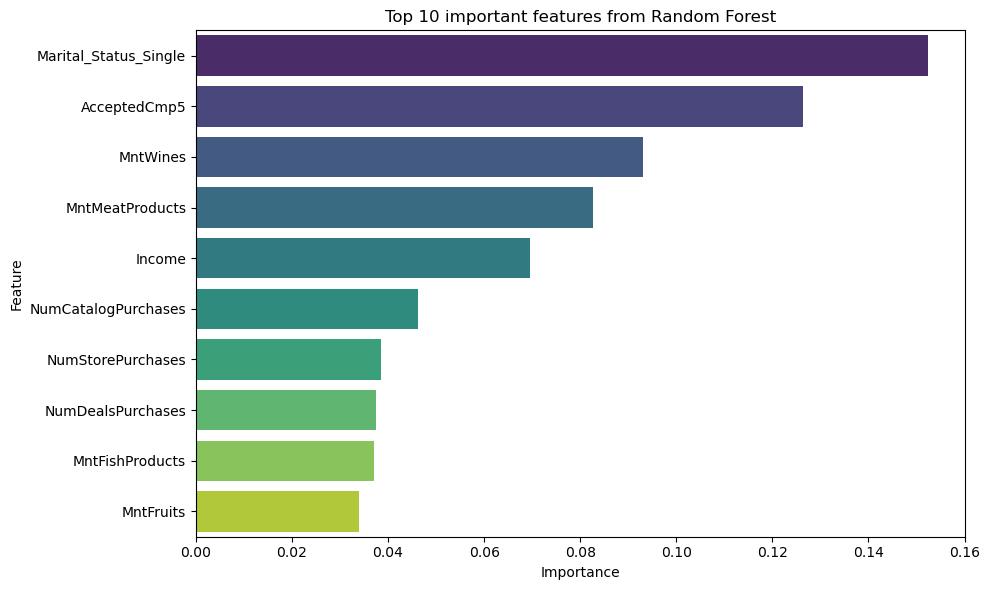

In [46]:
# Extracting feature importances from the best RF model
importances = best_model_rf.feature_importances_
feature_names = X_train.columns

# Create Dataframe
df_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by = 'Importance', ascending = False)

# Plot top 10 most important features
plt.figure(figsize = (10,6))
sns.barplot(df_importance.head(10), x = 'Importance', y = 'Feature', palette = 'viridis')
plt.title('Top 10 important features from Random Forest')
plt.tight_layout()
plt.show()

In [47]:
# Implementing the XgBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Handling class imbalance in xgboost
from sklearn.utils.class_weight import compute_sample_weight
sample_weights = compute_sample_weight(class_weight = 'balanced', y = y_train)

param_grid = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3,5,6,8],
    'subsample': [0.5, 0.8, 1.0]
}

grid_search_xgb = GridSearchCV(estimator = xgb, param_grid = param_grid, cv = 5, scoring = 'accuracy', n_jobs = -1)
grid_search_xgb.fit(X_train, y_train, sample_weight = sample_weights)

C:\Users\Priyanuj\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:24:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constrain...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 5, 6, 8],
                         'n_estimators': [100, 150, 200],
                         'subsample': [0.5, 0.8, 1.0]},
             scoring='accuracy')

In [48]:
print(grid_search_xgb.best_score_)
print(grid_search_xgb.best_params_)

0.9609436516705312
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.5}


In [49]:
best_model_xgb = grid_search_xgb.best_estimator_
y_pred = best_model_xgb.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.9508928571428571


In [50]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        55
           1       0.97      1.00      0.99        34
           2       0.99      0.96      0.98       163
           3       0.94      0.88      0.91       108
           4       0.88      0.97      0.92        88

    accuracy                           0.95       448
   macro avg       0.95      0.96      0.96       448
weighted avg       0.95      0.95      0.95       448

[[ 55   0   0   0   0]
 [  0  34   0   0   0]
 [  0   0 157   3   3]
 [  1   1   2  95   9]
 [  0   0   0   3  85]]


C:\Users\Priyanuj\AppData\Local\Temp\ipykernel_22180\3794327792.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=xgb_feature_df.head(10), x='Importance', y='Feature', palette='plasma')


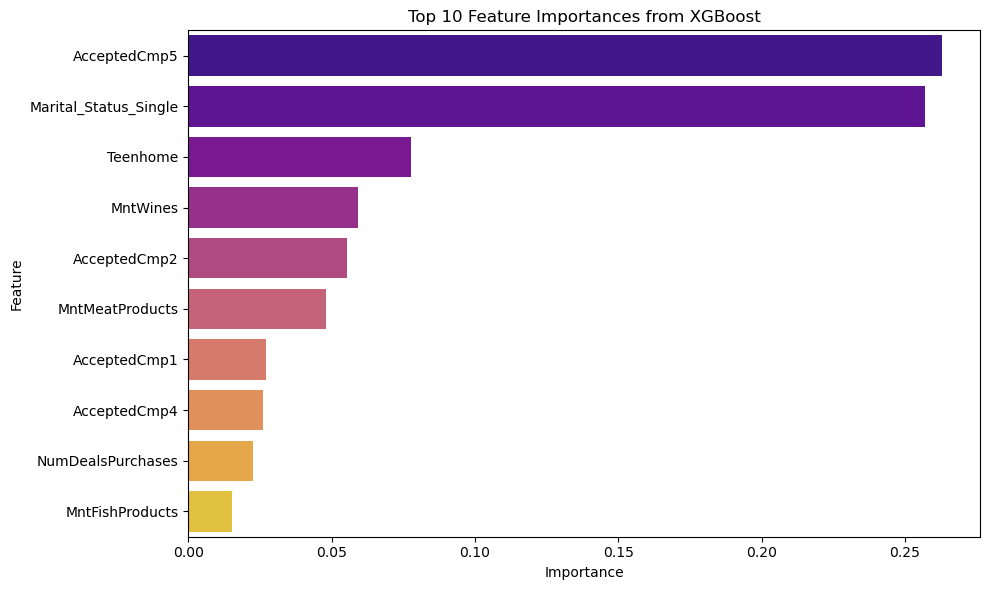

In [51]:
# Get feature importances from the best XGBoost model
xgb_importances = best_model_xgb.feature_importances_
xgb_feature_names = X_train.columns

# Create DataFrame for plotting
xgb_feature_df = pd.DataFrame({
    'Feature': xgb_feature_names,
    'Importance': xgb_importances
}).sort_values(by='Importance', ascending=False)

# Plot top 10 important features
plt.figure(figsize=(10, 6))
sns.barplot(data=xgb_feature_df.head(10), x='Importance', y='Feature', palette='plasma')
plt.title('Top 10 Feature Importances from XGBoost')
plt.tight_layout()
plt.show()

In [100]:
# Implementing SVM model
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', class_weight = 'balanced', random_state = 42)
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100]
}
grid_search_svm = GridSearchCV(estimator = svc, param_grid = param_grid, cv = 5, scoring = 'accuracy', n_jobs = -1)
grid_search_svm.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=SVC(class_weight='balanced', kernel='linear',
                           random_state=42),
             n_jobs=-1, param_grid={'C': [0.01, 0.1, 1, 10, 100]},
             scoring='accuracy')

In [102]:
print(grid_search_svm.best_score_)
print(grid_search_svm.best_params_)

0.9748883459641149
{'C': 0.1}


In [104]:
best_model_svm = grid_search_svm.best_estimator_
y_pred = best_model_svm.predict(X_test)
print('Accuracy Score:', accuracy_score(y_test, y_pred))

Accuracy Score: 0.984375


In [106]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        55
           1       1.00      1.00      1.00        34
           2       0.99      0.99      0.99       163
           3       0.98      0.95      0.97       108
           4       0.97      0.99      0.98        88

    accuracy                           0.98       448
   macro avg       0.98      0.99      0.99       448
weighted avg       0.98      0.98      0.98       448

[[ 55   0   0   0   0]
 [  0  34   0   0   0]
 [  0   0 162   1   0]
 [  1   0   1 103   3]
 [  0   0   0   1  87]]


#### Among all the models, Logistic Regression gives the best results and using this model to build a real time, interactive prediction app.

In [113]:
import joblib
import os
model_path = "C:/Users/Priyanuj/best_logistic_model.pkl"
joblib.dump(best_lr_model, model_path)

model_path

'C:/Users/Priyanuj/best_logistic_model.pkl'